In [77]:
import pandas as pd
import numpy as np

diabetes_data = pd.read_csv('C://Users/user/Downloads/diabetes.csv')

In [90]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
def precison_recall_curve_plot(y_test, pred, proba):
    precison, recall, threshold = precision_recall_curve(y_test, proba)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = threshold.shape[0]
    plt.plot(threshold, precison[0:threshold_boundary], linestyle = '--',label = 'precision')
    plt.plot(threshold, recall[0:threshold_boundary], label = 'recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show

In [30]:
diabetes_data.describe()
diabetes_data[diabetes_data[zero_columns[0]]==0]#이 bool이 true인 모든 열을 보여줌[조건만족행][전체 열(:)]이런느낌

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
4,0,137,40,35,168,43.1
16,0,118,84,47,230,45.8
45,0,180,66,39,0,42.0
57,0,100,88,60,110,46.8
58,0,146,82,0,0,40.5
...,...,...,...,...,...,...
713,0,134,58,20,291,26.4
727,0,141,84,26,0,32.4
736,0,126,86,27,120,27.4
753,0,181,88,44,510,43.3


In [31]:
zero_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data = diabetes_data[zero_columns].replace(0, diabetes_data[zero_columns].mean())

In [32]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000


In [35]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
np_imputed=mice(diabetes_data.values)

BadInputError: Data is not float.

In [79]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
imputer_mice = IterativeImputer(random_state=83)
imputer_mice.fit(diabetes_data.values)
diabetes_data = pd.DataFrame(imputer_mice.transform(diabetes_data.values),columns = diabetes_data.columns)

In [69]:

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
IterativeImputer(random_state=0)
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

print(X)

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]


In [78]:
diabetes_data[zero_columns] = diabetes_data[zero_columns].replace(0,'nan') 
#0이 아닌경우는 fillna로 nan으로 채우면 됨  data['column name'].fillna('nan', inplace = True)

In [82]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 {0:0.4f}, 정밀도 {1:0.4f}, 재현율 {2:0.4f}, f1{3:0.4f}, AUC:{4:0.4f}'.format(accuracy, precision, recall,f1, roc_auc)) #{순서}

In [84]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('Outcome', axis = 1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, pred, proba)

오차행렬
[[85 15]
 [22 32]]
정확도 0.7597, 정밀도 0.6809, 재현율 0.5926, f10.6337, AUC:0.8148


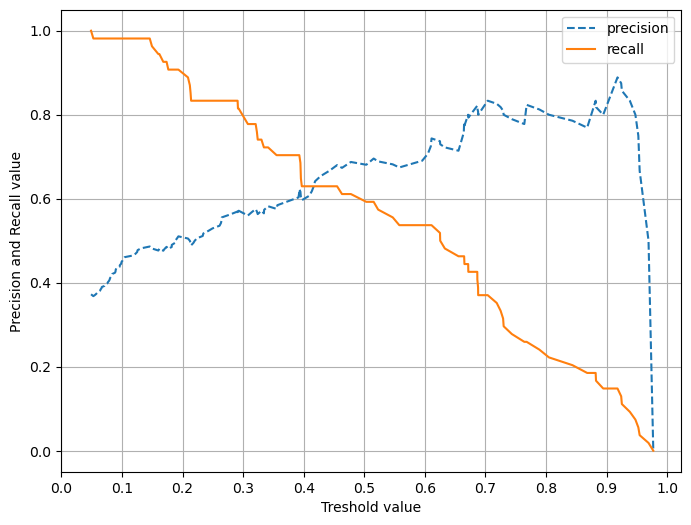

In [96]:
precison_recall_curve_plot(y_test, pred, proba)